# <span style="color:blue"> Laboratorio di simulazione numerica </span>
## <span style="color:green">  Esercitazione numero 10</span>

### Esercizio 10.1

In questo esercizio si va a risolvere il problema del commesso viaggiatore introducendo l'algoritmo di  "Simulated Annealing", ovvero dato un individuo $I$ si propone una mutazione $I'$, se la lunghezza totale della seconda è minore della prima allora si accetta la mutazione altrimenti la si accetta con probabilità $exp(\frac{L'-L}{T})$, dove T è una temperatura fittizia che parte da $10$ e diniuisce con un rate di $0.9999$

Questo permette di osservare all'inizio un gran numero di configurazioni e di stabilizzare il sistema nel suo minimo a temperature basse.

Di seguito è riportata la soluzione nel caso in cui $32$ città sono prima disposte in cerchio e poi scelte casualmente dentro un quadrato, queste soluzioni vengoso confrontate con quelle ottenute nell'esercitazione precedente. 

Si osserva che le soluzioni nel primo caso coincidono mentre nel secondo caso no, ma la differenza tra le due lunghezze totali è dell'odine di $0.005$, quindi accettabile.

#### Cerchio

In [34]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import statistics as stat 
import array as arr

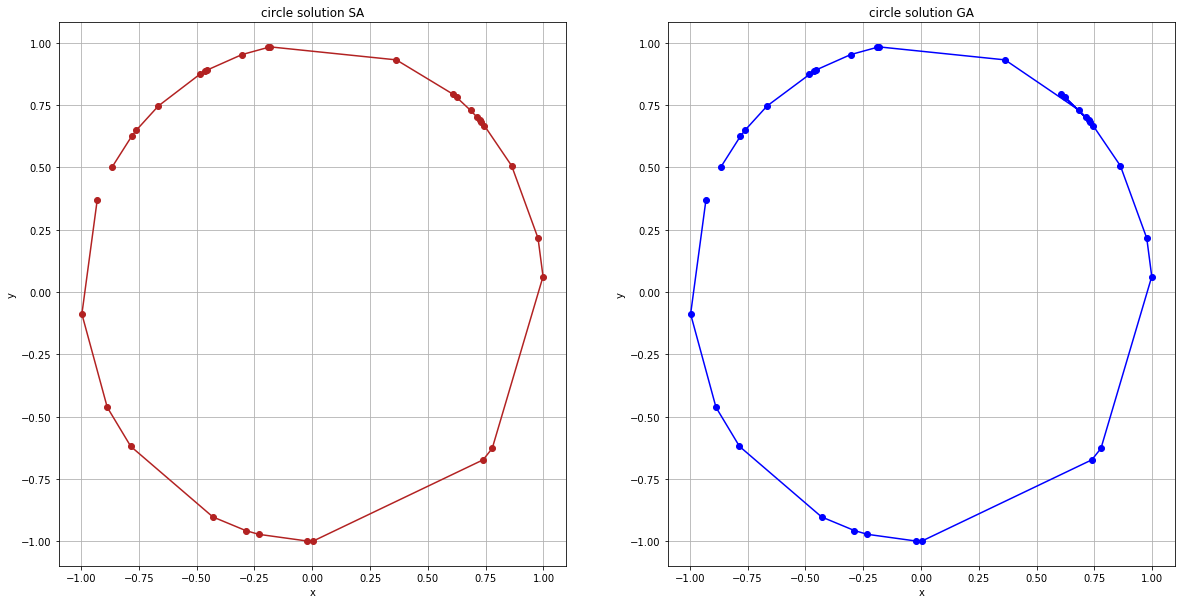

In [67]:

x,y = np.loadtxt("es1/solution_c.dat", usecols=(0,1),unpack='true')

fig=plt.figure(figsize=(20,10))

plt.subplot(121)
plt.plot(x, y, marker='o', color="firebrick")
plt.title('circle solution SA')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.subplot(122)
x,y = np.loadtxt("solution_c_old.dat", usecols=(0,1),unpack='true')
plt.plot(x, y, marker='o', color="blue")
plt.title('circle solution GA')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


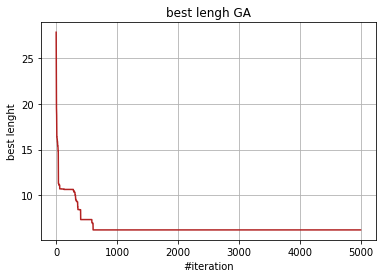

In [69]:
x,best = np.loadtxt("es1/best_c.dat", usecols=(0,1),unpack='true')
plt.plot(x,best, color="firebrick")
plt.grid(True)
plt.xlabel('#iteration')
plt.ylabel('best lenght')
plt.title('best lengh GA')
plt.show()

#### Quadrato

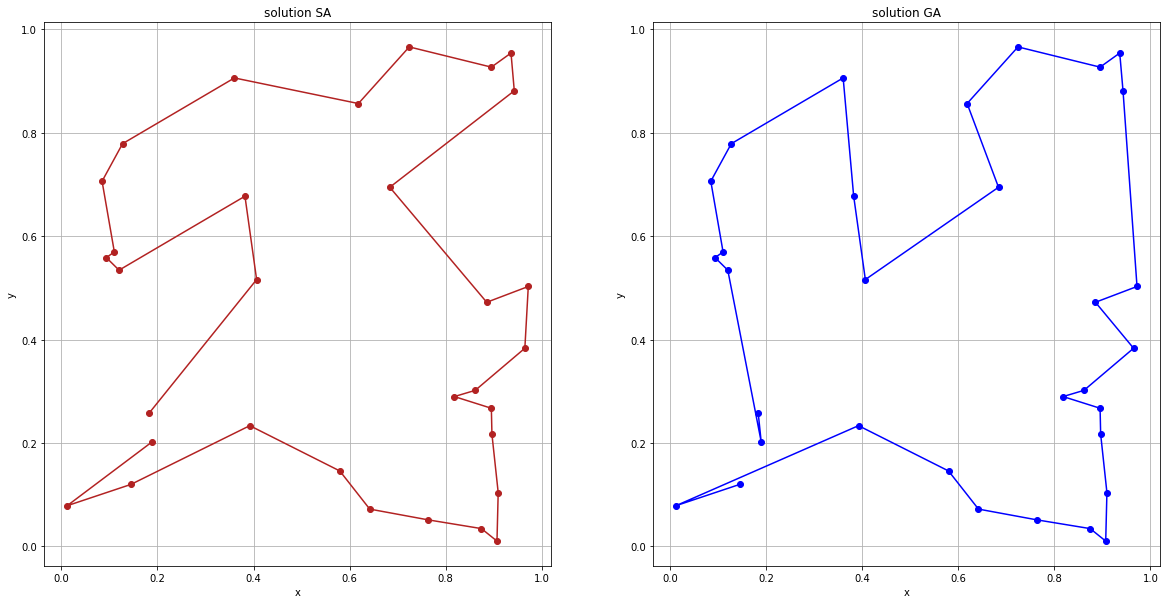

In [75]:
x,y = np.loadtxt("es1/solution_s.dat", usecols=(0,1),unpack='true')
fig=plt.figure(figsize=(20,10))

plt.subplot(121)

plt.plot(x, y, marker='o', color="firebrick")
plt.title("solution SA")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)


plt.subplot(122)
x,y = np.loadtxt("solution_s.dat", usecols=(0,1),unpack='true')
plt.plot(x, y, marker='o', color="blue")
plt.title('solution GA')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


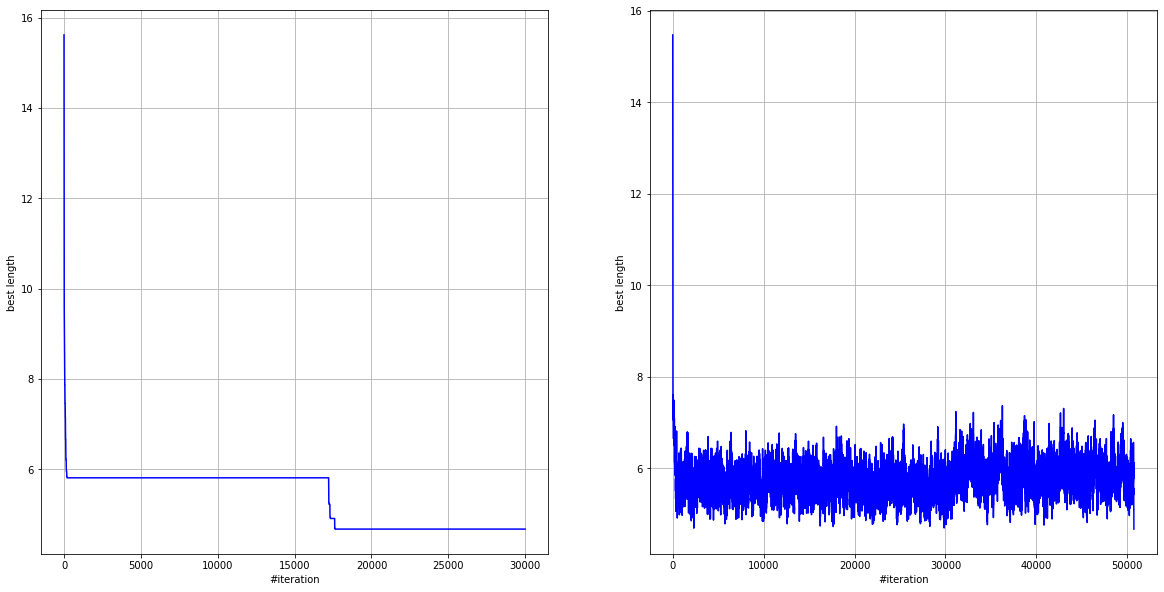

miglior risultato SA_______ 4.66943
miglior risultato GA_______ 4.66489


In [114]:
fig=plt.figure(figsize=(20,10))
x,best = np.loadtxt("es1/best_s.dat", usecols=(0,1),unpack='true')
plt.subplot(121)
plt.plot(x,best, color="blue")
plt.grid(True)
plt.xlabel('#iteration')
plt.ylabel('best length')



x2,best2 = np.loadtxt("best_s.dat", usecols=(0,1),unpack='true')
plt.subplot(122)
plt.plot(x2,best2, color="blue")
plt.grid(True)
plt.xlabel('#iteration')
plt.ylabel('best length')
plt.show()

print("miglior risultato SA_______",best[len(best)-1])
print("miglior risultato GA_______",best2[len(best2)-1])

### Es.10.2

In questo caso si va a modificare il codice dell'esercizio precedente andando a parallelizzarlo ovvero facendo compiere lo stesso codice a quattro nodi diversi e ad ogni cento passi i nodi si scambiano la soluzione migliore in modo casuale.

Per implementare lo scambio il nodo zero genera un vettore di quattro elementi che non è altro che la permutazione del vettore $(0,1,2,3)$, questo viene inviato a tutti gli altri e viene scambiato codice tra i primi due elementi e tra gli ultimi due dell'array.

Come ci si aspetta le soluzioni dei nodi sono identiche ma questa soluzione viene trovata in un tempo minore.

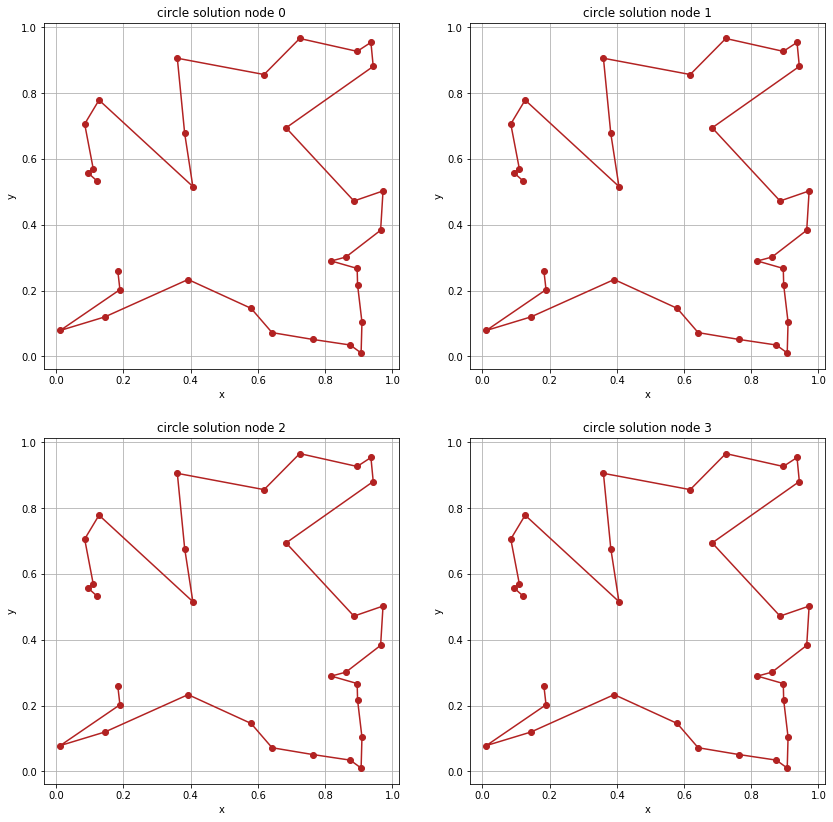

In [112]:
fig=plt.figure(figsize=(14,14))
for i in range (4):
    
    x,y = np.loadtxt("es2/solution_c"+str(i)+".dat", usecols=(0,1),unpack='true')
    n=220+i+1
    plt.subplot(n)
    plt.plot(x, y, marker='o', color="firebrick")
    plt.title('circle solution node '+str(i))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    
plt.show()

miglior risultato SA del nodo 0_______ 4.66943
miglior risultato SA del nodo 1_______ 4.66943
miglior risultato SA del nodo 2_______ 4.66943
miglior risultato SA del nodo 3_______ 4.66943


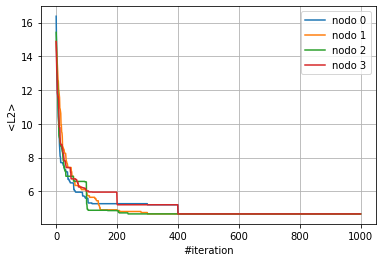

In [113]:
for i in range (4):
    x,average = np.loadtxt("es2/best_c."+str(i)+".dat", usecols=(0,1),unpack='true')
    plt.plot(x,average, label='nodo '+str(i))
    plt.grid(True)
    plt.xlabel('#iteration')
    plt.ylabel('<L2>')
    plt.legend()
    print("miglior risultato SA del nodo "+str(i)+"_______",best[len(best)-1])